In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from qutip import *
import scipy as sp

# Nonreciprocity: General Formalism

Condensed version of "Nonreciprocal Photon Transmission and Amplification via Reservoir Engineering" by A. Metelmann and A.A. Clerk (2015) (https://journals.aps.org/prx/pdf/10.1103/PhysRevX.5.021025), especially the intro to Section II and Section II.A. 

We can obtain directionality in a two body system by cleverly engineering our dissipation via reservoir enginering. We begin with the coherent interaction described by the quadratic Hamiltonian (note $\hbar =1$ ):

$ \hat{\mathcal{H}}_{coh} = J\hat{a}^\dagger \hat{b} + \lambda\hat{a}^\dagger \hat{b}^\dagger + H.c.$ (1)

where $\hat{a}$ and $\hat{b}$ are our cavity modes and $J$ and $\lambda$ are complex. If we also couple both these modes to a dissapative reservoir and then eliminate the reservoir degree of freedom, we can generate an effective dissipative interaction between the cavities that can be described by including an additional term to the general master equation for our system:

$\frac{d}{dt}\hat{\rho} = -i[\hat{\mathcal{H}}_{coh},\hat{\rho}] + \Gamma\mathcal{L}[\hat{z}]\hat{\rho} + \sum_{j=a,b}\kappa_j\mathcal{L}[\hat{j}]\hat{\rho}$ (2)

where $\hat{\rho}$ is the reduced density matrix of the two cavity modes, and $\kappa$ is the cavity decay rates (or couplings to their input/output ports). We can set $\kappa$ for both cavities equal to eachother for simplicity (which we will do moving forward i.e. $\kappa_a=\kappa_b=\kappa$) without changing the relevant pohysics. The second term descibes the cavities' interaction with the engineered resevorir at rate $\Gamma$ using the dissipation operator: 

$\hat{z} = \sum_{j=a,b}u_j\hat{j} + v_j\hat{j}^\dagger$ (3)

where the coefficients $u_j$ and $v_j$ characterize the coupling of each cavity to the engineered reservoir. In order to obtain directionality we must consrtuct $\hat{\mathcal{H}}_{coh}$ for the desired behavior (transmission or amplification) then balance it with the dissipative interaction by cleverly selecting the values of $\Gamma$, $u_j$, and $v_j$. To illustrate this process, we derive the equations of motion for the expectation values of our cavity operators. Deriving these from (3) we obtain:

$
\frac{d}{dt}\langle\hat{a}\rangle = 
-\frac{\Gamma_a +\kappa}{2}\langle\hat{a}\rangle 
-i\left[J + i\mu\frac{\Gamma}{2}\right]\langle\hat{b}\rangle 
-i\left[\lambda + i\nu\frac{\Gamma}{2}\right]\langle\hat{b}^\dagger\rangle
\\
\frac{d}{dt}\langle\hat{b}\rangle = 
-\frac{\Gamma_b +\kappa}{2}\langle\hat{b}\rangle 
-i\left[J^* + i\mu^*\frac{\Gamma}{2}\right]\langle\hat{a}\rangle 
-i\left[\lambda - i\nu\frac{\Gamma}{2}\right]\langle\hat{a}^\dagger\rangle  
$ (4)

where $\Gamma_{a,b} = \Gamma\left( \vert u_{a,b} \vert^2 + \vert v_{a,b} \vert ^2 \right)$ which describes the local damping induced by the engineered resevoir, $\mu = v_a v_b^* - u_a^*u_b$, and $\nu = v_a u_b^* - u_a^* v_b$. Our modes can be decoupled, and their interaction can be rendered directional from $a\rightarrow b$ by setting:

$
J = -i\mu\frac{\Gamma}{2}
\\
\lambda = -i\nu\frac{\Gamma}{2} 
$ (5)

Substituting (5) into (4), we see that:

$
\frac{d}{dt}\langle\hat{a}\rangle = 
-\frac{\Gamma_a +\kappa}{2}\langle\hat{a}\rangle 
\\
\frac{d}{dt}\langle\hat{b}\rangle = 
-\frac{\Gamma_b +\kappa}{2}\langle\hat{b}\rangle 
-i\left[i\mu^*\Gamma\right]\langle\hat{a}\rangle 
+ i\left[i\nu\Gamma\right]\langle\hat{a}^\dagger\rangle  
$ 

meaning the evolution of cavity a is independent of cavity b, but the evolution of cavity b is still dependent on cavity a, rendering the interaction nonreciprocal.

# Unidirectional Photon Hopping

Forthe application of transduction, we set $\lambda = 0$ and obtain a standard Jaynes-Cummings interaction Hamiltonian:

$\hat{\mathcal{H}}_{coh} = J\hat{a}^\dagger \hat{b} + J^*\hat{a}\hat{b}^\dagger $ (5)

To capture the dissaptive interaction with the egineered resevoir, we need an interaction that absorbs quanta from either cavity (its crucial that there is coherence between absorption of a photon from cavity a vs cavity b). Thus, we set the engineered resevoir dissipation operator (jump operator ) to:

$\hat{z} = \hat{a} + e^{i\phi}\hat{b}  $ (6) (does this need to be normalized??? Cause its not in the paper)

The master quation reduces to:

$\frac{d}{dt}\hat{\rho} = -i[\hat{\mathcal{H}}_{coh},\hat{\rho}] + \Gamma\mathcal{L}[\hat{a} + e^{i\phi}\hat{b}]\hat{\rho} + \kappa\sum_{j=a,b}\mathcal{L}[\hat{j}]\hat{\rho}$ (7)

According to Metelmann,Clerk, 2015, the relative phase $\phi$ present in the jump operator can be shifted into the phase of $J$ via a gauge transformation. Therefore, we can set $\phi = 0$ and keep $J$ complex, meaning $\mu=-1$ and $\nu=0$. Plugging these values into equation (5) we can now solve for the $J$ value that satisfies our nonreciprocity condition:

$J = i\frac{\Gamma}{2}$ (80

We can further illustrate this point by deriving equations of motion for the cavity operator expectation values:

$
\frac{d}{dt}\langle\hat{a}\rangle = 
- \frac{\Gamma +\kappa}{2}\langle\hat{a}\rangle 
- \left[iJ + \frac{\Gamma}{2}\right]\langle\hat{b}\rangle 
\\
\frac{d}{dt}\langle\hat{b}\rangle = 
- \frac{\Gamma +\kappa}{2}\langle\hat{b}\rangle 
- \left[iJ^* + \frac{\Gamma}{2}\right]\langle\hat{a}\rangle 
$ (9) 

plugging (8) into (9) yields:

$
\frac{d}{dt}\langle\hat{a}\rangle = 
- \frac{\Gamma +\kappa}{2}\langle\hat{a}\rangle  
\\
\frac{d}{dt}\langle\hat{b}\rangle = 
- \frac{\Gamma +\kappa}{2}\langle\hat{b}\rangle 
- \Gamma\langle\hat{a}\rangle 
$ (9) 

Which shows that photons in cavity a tunnel to cavity b, but photons in cavity b dont tunnel to cavity a. Below I simulated the number state proability of 2 cavities (beginning with one photon in the 1st cavity) using this formalism.  


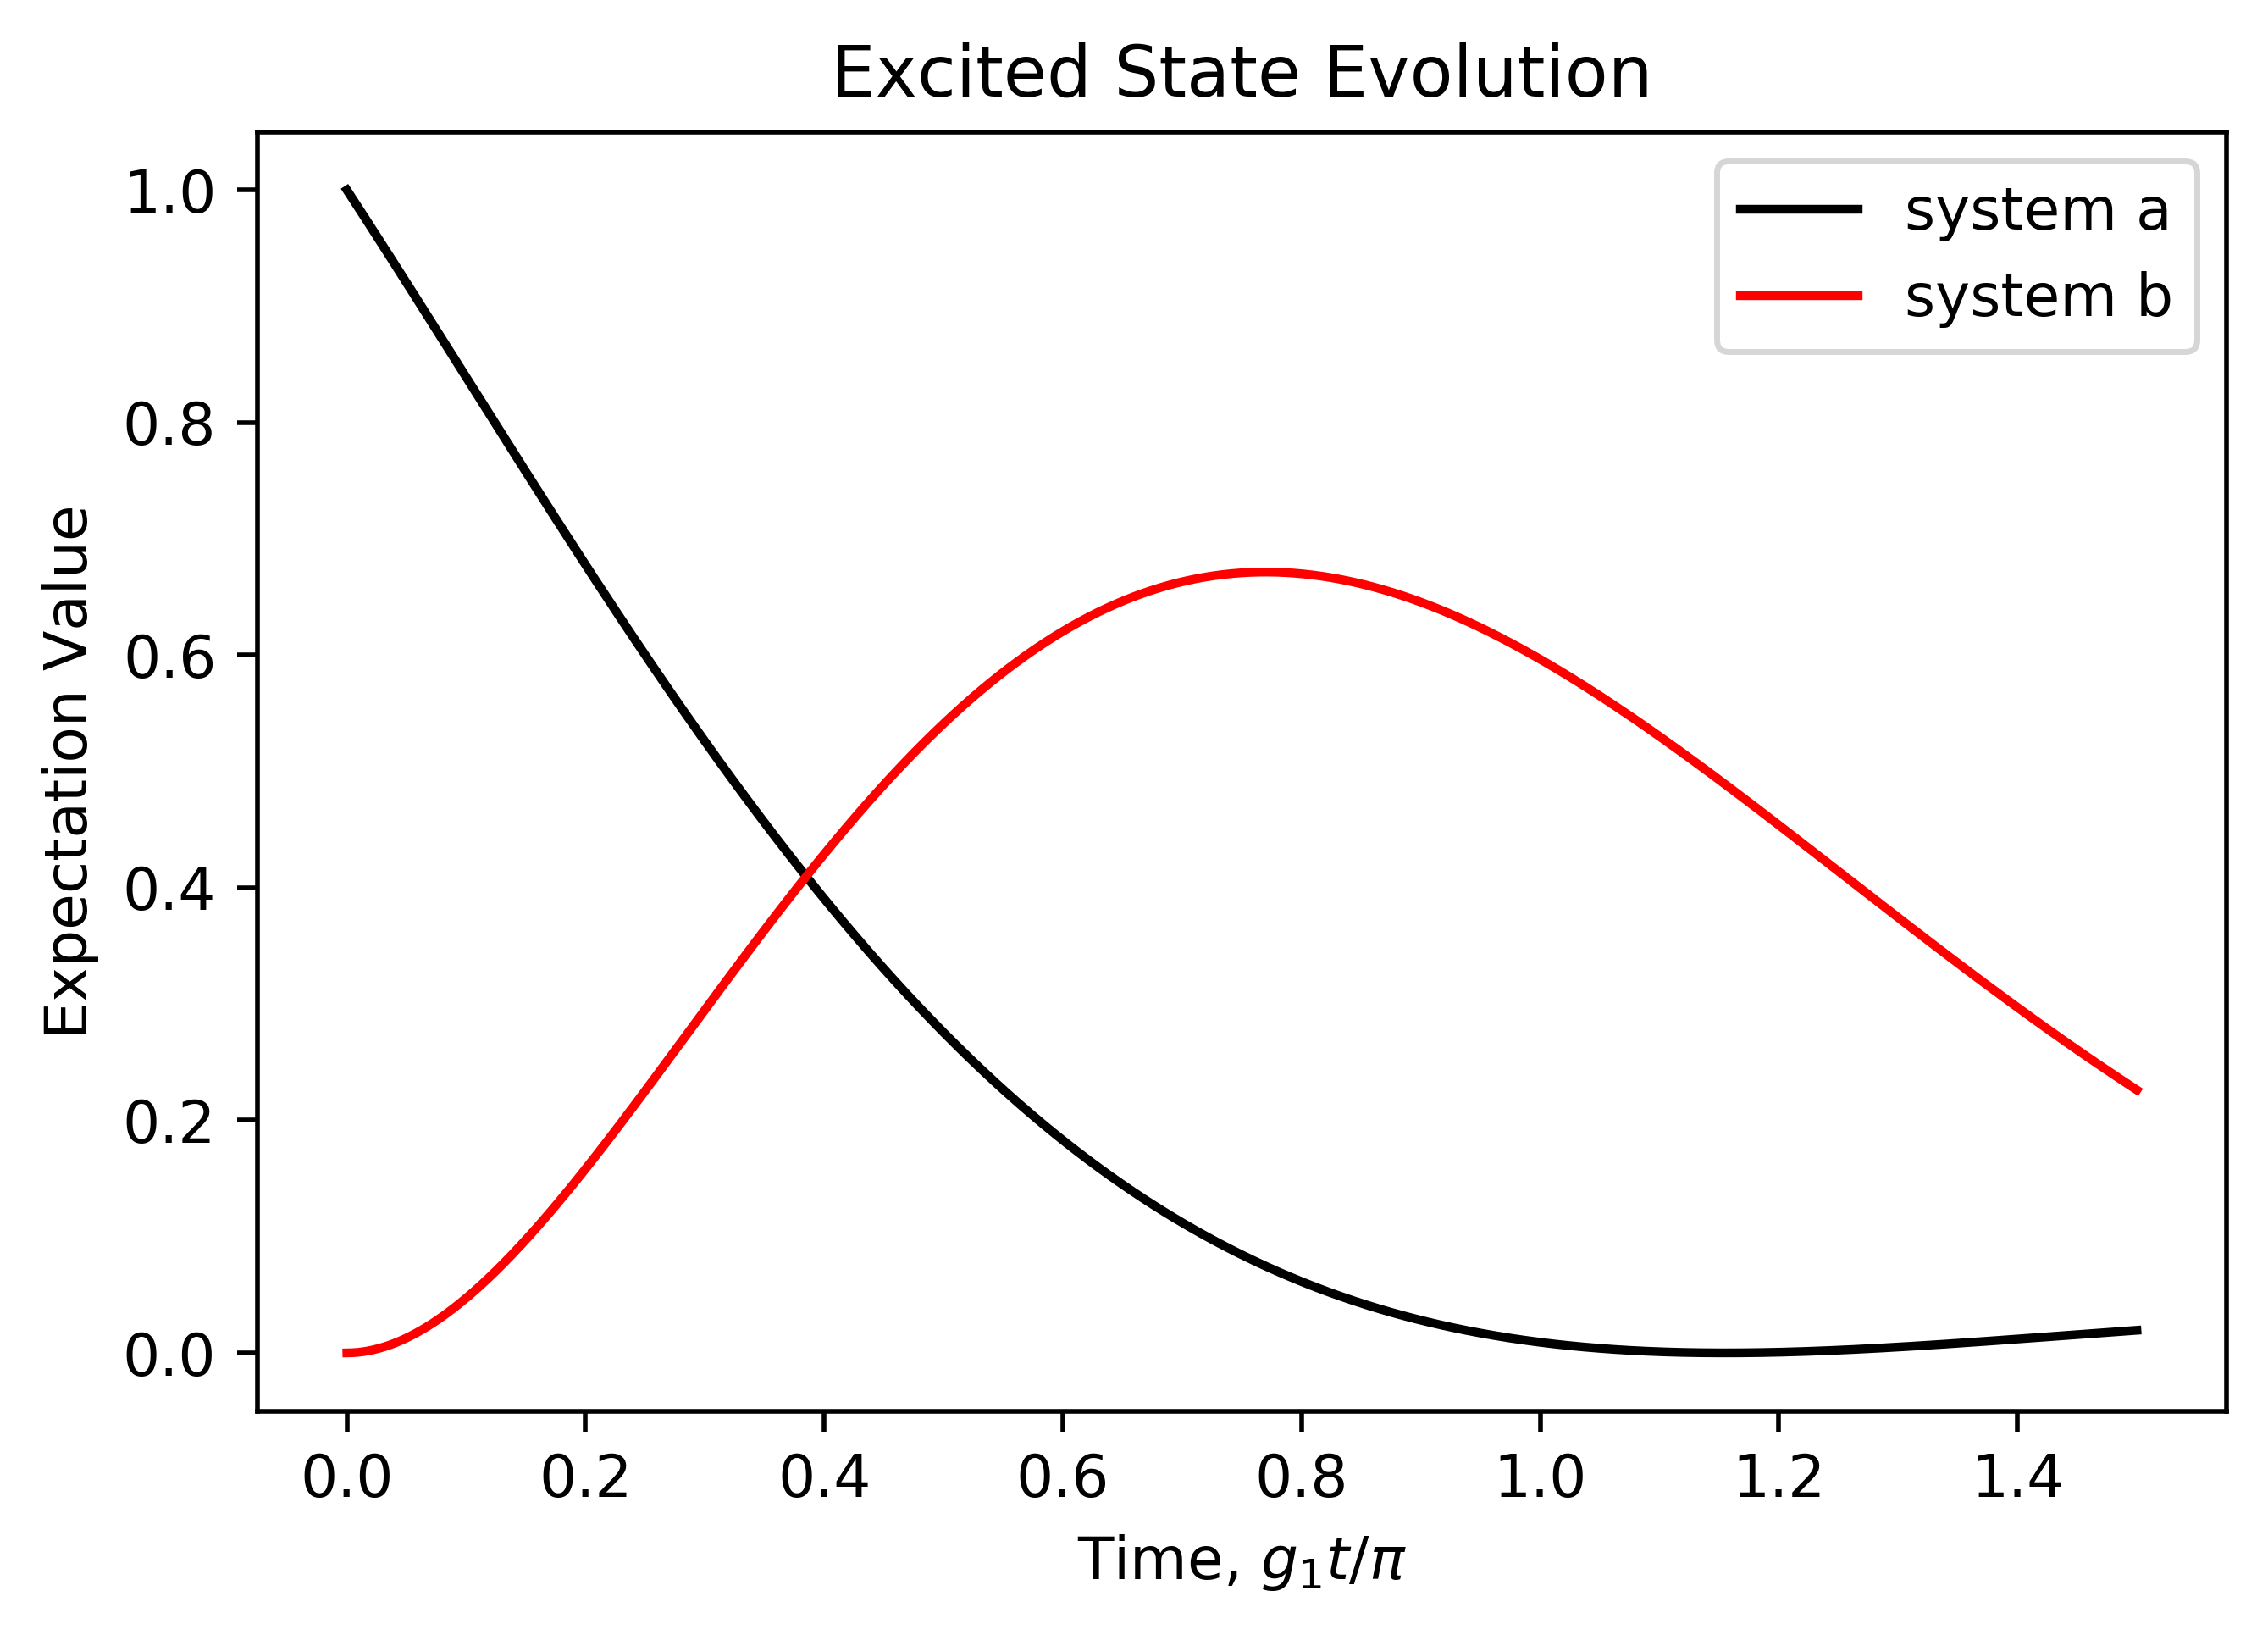

In [2]:
#truncation
N = 5

#annihilation operators
a = tensor(destroy(N), qeye(N))
b = tensor(qeye(N), destroy(N))

#number operators 
na = a.dag()*a
nb = b.dag()*b

#resevoir interaction strength
gamma = 1.00

#cavity decay rate
k = 0.00

#normal collapse operators
c1 = np.sqrt(k)*a
c2 = np.sqrt(k)*b
#jump operator
c3 = np.sqrt(gamma)*(a + b)/np.sqrt(2.00) # operator is normalized 
c_ops = [c1,c2,c3]

#Hamiltonian 
H = (1.00j*gamma/2.00)*(a.dag()*b) + (-1.00j*gamma/2.00)*(a*b.dag())

#time steps
Nt = 1000
#rabi period?
tmax = 1.00*np.pi/(2*gamma)
#time vector
t1 = np.linspace(0.00, 3.00*tmax, Nt)

psi0 = tensor(fock(N,1), fock(N,0))

result1 = mesolve(H, psi0, t1, c_ops, [])

rho1 = result1.states  
Na1 = expect(na, rho1) 
Nb1 = expect(nb, rho1)  

#rho0  = rho1[0]; 
#rho00 = rho0.ptrace(0)

#rhof = rho1[Nt-1]
#rhoff = rhof.ptrace(1)

#F = fidelity(rhoff, rho00)


fig, ax = plt.subplots(dpi=500)
ax.plot(t1/np.pi, Na1, label= 'system a', color='black')
ax.plot(t1/np.pi, Nb1, label= 'system b', color='red')
#ax.axvline(x = tmax/np.pi, label= 'Swap #1', color='green', linestyle=':')
plt.xlabel('Time, $g_1 t/\pi$')
plt.ylabel('Expectation Value')
plt.title('Excited State Evolution')
plt.legend()
plt.show()

# Initial Conclusions/ Questions:

- Is there a way to fully transfer the excitation from cavity a to cavity b? Currently its ~ 70% without cavity decay. This may have negative implications for our transduction fidelity.  
- Is the an easy way to engineer a resevoir such that it takes the form of a third cavity?
- How much does nonreciprocity (represented in this way) reduce cavity decay? 

Might also be good to take a look at the following articles (these were referenced in Metelmann,Clerk (2015)

- https://iopscience.iop.org/article/10.1088/1367-2630/16/10/103027/pdf
- https://iopscience.iop.org/article/10.1088/1367-2630/17/2/023024/pdf
- http://wwwuser.cnb.csic.es/~jpoyatos/Publications/QM_1996.pdf
- https://journals.aps.org/prl/abstract/10.1103/PhysRevLett.70.2269
- https://journals.aps.org/prl/abstract/10.1103/PhysRevLett.70.2273
- https://www.researchgate.net/profile/Jacob_Robinson2/publication/26285228_Optical_Nonreciprocity_in_Optomechanical_Structures/links/00b4953234c8a80ec4000000.pdf